In [2]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
features_df = pd.read_csv('../../data/gene_cnv_df_128.csv')
label_df = pd.read_csv("../../data/final_labels.csv")

In [4]:
features_df.head()

,case_id,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,TCGA-33-4582,-0.538320,1.032815,-0.207708,0.828670,-0.533079,1.257552,-0.617863,1.119022,-0.152546,...,-0.655609,-0.711586,-0.698807,1.450487,-0.447062,-0.620233,0.452437,-0.694994,-0.713119,-0.344749
1,TCGA-LA-A7SW,1.959446,-0.998570,0.372400,-0.752460,-0.533079,2.197323,-0.617863,-0.551743,-0.643232,...,-0.655609,-0.711586,-0.698807,4.055389,1.378998,-0.067373,2.029083,2.765881,-0.707433,-0.304322
2,TCGA-43-5670,0.832611,1.379605,-0.849680,-0.446544,-0.533079,-0.724448,-0.617863,1.812993,0.738104,...,-0.411734,-0.297049,1.678690,1.570264,0.516068,0.069641,1.477633,0.332023,-0.713119,-0.344749
3,TCGA-21-5782,6.541538,-0.998570,-0.849680,-0.752460,-0.533079,-0.738057,-0.239469,4.893093,3.645806,...,-0.655609,-0.711586,0.407032,-0.765153,-0.695914,-0.620233,3.810906,-0.694994,-0.713119,-0.088886
4,TCGA-22-4601,0.420577,-0.998570,-0.849680,-0.752460,-0.533079,-0.738057,1.990268,-0.394083,-0.643232,...,-0.595247,-0.676838,1.811497,-0.765153,-0.695914,-0.620233,-0.754544,0.549223,0.589029,-0.344749


In [5]:
label_df_2 = label_df.groupby(['Case_ID_Final','LABEL','final_label','Project ID']).agg({'File ID':'nunique'}).reset_index()
label_df_2.index = label_df_2['Case_ID_Final']
label_df_2

,Case_ID_Final,LABEL,final_label,Project ID,File ID
Case_ID_Final,,,,,
TCGA-05-4244,TCGA-05-4244,ALC,"Adenocarcinoma, NOS",TCGA-LUAD,2
TCGA-05-4249,TCGA-05-4249,ALC,"Adenocarcinoma, NOS",TCGA-LUAD,2
TCGA-05-4250,TCGA-05-4250,ALC,"Adenocarcinoma, NOS",TCGA-LUAD,2
TCGA-05-4382,TCGA-05-4382,ALC,Adenocarcinoma with mixed subtypes,TCGA-LUAD,2
TCGA-05-4384,TCGA-05-4384,ALC,Adenocarcinoma with mixed subtypes,TCGA-LUAD,2
...,...,...,...,...,...
TCGA-O2-A52V,TCGA-O2-A52V,SCLC,"Squamous cell carcinoma, NOS",TCGA-LUSC,2
TCGA-O2-A52W,TCGA-O2-A52W,SCLC,"Squamous cell carcinoma, NOS",TCGA-LUSC,2
TCGA-O2-A5IB,TCGA-O2-A5IB,SCLC,"Squamous cell carcinoma, NOS",TCGA-LUSC,2


In [6]:
labels = label_df_2.loc[features_df['case_id']]['LABEL']
labels_more = label_df_2.loc[features_df['case_id']]['final_label']
projects = label_df_2.loc[features_df['case_id']]['Project ID']

### Using t-SNE 

/Users/arnavgupta/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/arnavgupta/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 954 samples in 0.000s...
[t-SNE] Computed neighbors for 954 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 954 / 954
[t-SNE] Mean sigma: 3.069786
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.742371
[t-SNE] KL divergence after 1000 iterations: 1.300235


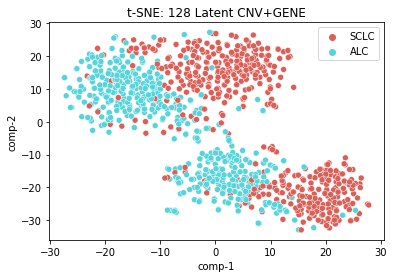

In [7]:
X = features_df.iloc[:,1:]
Y = labels
tsne = TSNE(n_components=2, verbose=1, random_state=13)
z = tsne.fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["y_more"] = labels_more
df["projects"] = projects
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]


pt1 = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df)
pt1.set(title="t-SNE: 128 Latent CNV+GENE")
pt1.get_figure().savefig("../../Figures/tsne_cnv_gene_1.png")

## Using PCA

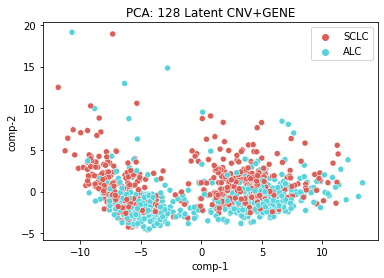

In [8]:
X = features_df.iloc[:,1:]
Y = labels
pca = PCA(n_components=2)
z = pca.fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

pt1 = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df)
pt1.set(title="PCA: 128 Latent CNV+GENE")
pt1.get_figure().savefig("../../Figures/pca_cnv_gene.png")

In [9]:
pca.explained_variance_ratio_.cumsum()

array([0.26020008, 0.3186482 ])

## 10 fold cross validation

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from mlmodels import cross_validate_custom

In [11]:
VC = VotingClassifier(estimators=[('SVM', SVC(kernel = 'rbf', probability=True)),
 ('RF', RandomForestClassifier(n_estimators=100))],voting='soft')
estimators = [SVC(kernel='rbf',probability=True), RandomForestClassifier(n_estimators=100),VC]

In [12]:
result = []
for estimator in estimators:
    result.append(cross_validate_custom(X,Y,estimator))
result = pd.DataFrame(result,index = ['SVM','RF','Voting'])
result


,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std
SVM,0.936009,0.030003,0.937050,0.030024,0.936752,0.030085,0.935987,0.03002,0.980069,0.016166
RF,0.936064,0.026295,0.936750,0.025897,0.936381,0.026491,0.936003,0.02634,0.977360,0.012161
Voting,0.944408,0.024529,0.945394,0.024443,0.944895,0.024679,0.944365,0.02455,0.983085,0.012624
